### KERAS MODEL

In [20]:
# ¡NO EJECUTAR NOTEBOOK!

In [1]:
import pandas as pd
import numpy as np

import pickle as pkl

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

In [3]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers, regularizers
from keras.optimizers import Adam

In [4]:
# Sin outliers
df_all = pd.read_parquet("data/dataset_final_no_outliers.parquet/")

In [5]:
df_all.drop(["DepartureDelayGroups", "DepTime", "CRSDepTime", "CRSArrTime", "DepDel15",
             "FlightDate", "DepDelayMinutes", "ArrTime", "ArrDelayMinutes", 
             "ArrivalDelayGroups", "ArrDel15", "ArrDelay"], axis = 1, inplace = True)

In [6]:
df_all

,DepDelay,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,...,Operating_AirlineIndex,Tail_NumberIndex,OriginCityNameIndex,OriginStateIndex,OriginStateNameIndex,DestCityNameIndex,DestStateIndex,DestStateNameIndex,DepTimeBlkIndex,ArrTimeBlkIndex
0,-5.0,54.0,88.0,74.0,302.0,2018,1,1,1,1,...,8.0,1237.0,1.0,4.0,4.0,134.0,31.0,31.0,9.0,8.0
1,-7.0,50.0,83.0,96.0,302.0,2018,1,1,1,1,...,8.0,1237.0,134.0,31.0,31.0,1.0,4.0,4.0,5.0,5.0
2,-1.0,55.0,85.0,76.0,399.0,2018,1,1,1,1,...,8.0,1682.0,1.0,4.0,4.0,184.0,7.0,7.0,17.0,15.0
3,-6.0,30.0,60.0,50.0,147.0,2018,1,1,1,1,...,8.0,6794.0,1.0,4.0,4.0,170.0,31.0,31.0,8.0,10.0
4,-8.0,31.0,66.0,48.0,147.0,2018,1,1,1,1,...,8.0,6794.0,170.0,31.0,31.0,1.0,4.0,4.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28059883,-11.0,32.0,72.0,86.0,143.0,2022,3,7,31,7,...,5.0,853.0,79.0,5.0,5.0,15.0,14.0,14.0,8.0,0.0
28059884,-9.0,79.0,127.0,125.0,583.0,2022,3,7,31,7,...,5.0,1197.0,99.0,7.0,7.0,15.0,14.0,14.0,6.0,6.0
28059885,-12.0,51.0,88.0,77.0,296.0,2022,3,7,31,7,...,5.0,1061.0,40.0,21.0,21.0,0.0,3.0,3.0,7.0,6.0
28059886,-3.0,115.0,150.0,161.0,748.0,2022,3,7,31,7,...,5.0,884.0,24.0,16.0,16.0,15.0,14.0,14.0,7.0,2.0


In [6]:
# Comprobamos que TensorFlow usa la GPU
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### MinMaxScaler

In [7]:
X = df_all.drop("DepDelay", axis = 1)
y = df_all[["DepDelay"]].values

Hicimos una **copia** para mantener la X inicial que posteriormente escalariamos y usaríamos en el modelo. Decidimos usar la copia para **.future_selection** y **.features_importances**.

In [8]:
# X_copy = X.copy()

In [9]:
# feature_names = np.array(X.columns)

In [10]:
# X_scaler = MinMaxScaler()
# X_copy = X_scaler.fit_transform(X_copy)

# X_copy

In [11]:
X = X[["DestStateNameIndex", "TaxiOut", "DepTimeBlkIndex", "WheelsOff",
       "DestWac", "AirTime", "CRSElapsedTime", "Operating_AirlineIndex",
       "Month", "OriginStateNameIndex", "Flight_Number_Operating_Airline",
       "WheelsOn", "AirlineIndex", "DOT_ID_Marketing_Airline",
       "ActualElapsedTime", "OriginAirportSeqID",
       "DOT_ID_Operating_Airline", "Quarter", "Tail_NumberIndex",
       "DestAirportSeqID", "OriginCityMarketID", "OriginIndex", "DayofMonth"]]

In [13]:
# X = X[["DestStateNameIndex", "TaxiOut", "DepTimeBlkIndex", "DestWac",
#        "AirTime", "CRSElapsedTime", "Operating_AirlineIndex",
#        "Month", "OriginStateNameIndex", "Flight_Number_Operating_Airline",
#        "AirlineIndex", "DOT_ID_Marketing_Airline", "ActualElapsedTime", 
#        "OriginAirportSeqID", "DOT_ID_Operating_Airline", "Quarter", "Tail_NumberIndex",
#        "DestAirportSeqID", "OriginCityMarketID", "OriginIndex", "DayofMonth"]]

In [12]:
X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)

X

array([[0.59615385, 0.0625    , 0.5       , ..., 0.0539337 , 0.00258398,
        0.        ],
       [0.07692308, 0.15625   , 0.27777778, ..., 0.08114795, 0.35917313,
        0.        ],
       [0.13461538, 0.0703125 , 0.94444444, ..., 0.0539337 , 0.00258398,
        0.        ],
       ...,
       [0.05769231, 0.078125  , 0.38888889, ..., 0.16427511, 0.11886305,
        1.        ],
       [0.26923077, 0.1015625 , 0.38888889, ..., 0.10275441, 0.06976744,
        1.        ],
       [0.26923077, 0.0703125 , 0.66666667, ..., 0.10737259, 0.04134367,
        1.        ]])

In [13]:
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y)

y

array([[0.06818182],
       [0.05909091],
       [0.08636364],
       ...,
       [0.03636364],
       [0.07727273],
       [0.07272727]])

Guardamos los escaladores sin **outliers** para utilizarlos en **streamlit** posteriormente.

In [16]:
with open("data/X_scaler_NO.pkl", "bw") as file:
    pkl.dump(X_scaler, file)
    
with open("data/y_scaler_NO.pkl", "bw") as file:
    pkl.dump(y_scaler, file)

### f_regression

In [17]:
# # SelectKBest

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression

# k = 24

# f_selection = SelectKBest(score_func = f_regression,
#                           k          = k)
# f_selection.fit(X_copy, y.ravel())
# X_fs = f_selection.transform(X_copy)

# X_fs.shape
# # Se queda con las mejores k columnas

In [18]:
# # Columnas f_regression
# feature_names[f_selection.get_support()]

![f_regression future selection](f_regression.jpeg)

### mutual_info_regression

In [19]:
# # SelectKBest

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import mutual_info_regression

# k = 24

# f_selection = SelectKBest(score_func = mutual_info_regression,
#                           k          = k)
# f_selection.fit(X_copy, y.ravel())
# X_fs = f_selection.transform(X_copy)

# X_fs.shape
# # Se queda con las mejores k columnas

In [20]:
# # Columnas mutual_info_regression
# feature_names[f_selection.get_support()]

![mutual_info_regression future selection](mutual_info_regression.jpeg)

Usamos **.feature_selection** para ver que columnas eran más importantes. Terminamos usando las columnas de **.features_importances** porque acabó arrojándonos una métrica decente.

### RandomForestRegressor (.feature_importances_)

In [21]:
# # Comprobamos con .features_importances_ qué columnas de datos son las más relevantes

# random_forest = RandomForestRegressor(n_estimators = 100)

# random_forest.fit(X, y.ravel())

# feature_importances = random_forest.feature_importances_

# # Ordenar las características de mayor a menor importancia
# sorted_features = df_all.columns[np.argsort(feature_importances)[::-1]]

![Características ordenadas de mayor a menor importancia](feature_importances.png)

### train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### Modelo

In [15]:
model = Sequential()

# Entrada
model.add(Dense(units = 128, input_shape = (X.shape[1], ), activation = "relu"))

# Capas ocultas
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.2))

# model.add(Dense(units = 128, activation = "relu")) -----> # INNECESARIO
# model.add(Dropout(0.2))
# model.add(Dense(units = 64, activation = "relu")) -----> # INNECESARIO
# model.add(Dropout(0.2))

# Salida
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

Comprobamos que al añadir nuevas **capas densas** y ganar parámetros a entrenar es peor para el modelo y para sus métricas.

Un único **Dropout** es suficiente.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3072      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 36,353
Trainable params: 36,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 3,
                    verbose = 1)

Epoch 1/3
701498/701498 [==============================] - 2331s 3ms/step - loss: 0.0042 - mae: 0.0394 - val_loss: 0.0026 - val_mae: 0.0341
Epoch 2/3
701498/701498 [==============================] - 2379s 3ms/step - loss: 0.0031 - mae: 0.0355 - val_loss: 0.0029 - val_mae: 0.0333
Epoch 3/3
701498/701498 [==============================] - 2391s 3ms/step - loss: 0.0030 - mae: 0.0348 - val_loss: 0.0025 - val_mae: 0.0318


Ajustamos los **epochs** a 3 porque comprobamos que a partir del quinto **epoch** aumenta la pérdida; 10 serían innecesarios.

In [18]:
y_hat = model.predict(X_test)

175375/175375 [==============================] - 221s 1ms/step


In [19]:
r2 = r2_score(y_test, y_hat)
print("R2 Score: ", r2)

R2 Score:  0.834778524109216


La métrica **mejoró** drásticamente sin outliers.

In [28]:
# Métricas
scores = model.evaluate(X_test, y_test, verbose = 1)

scores

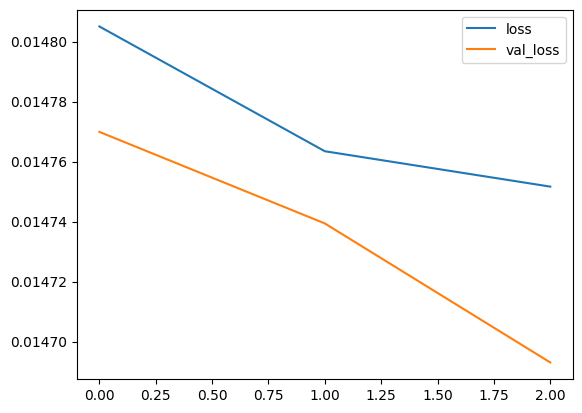

In [29]:
# loss (mean_squared_error)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

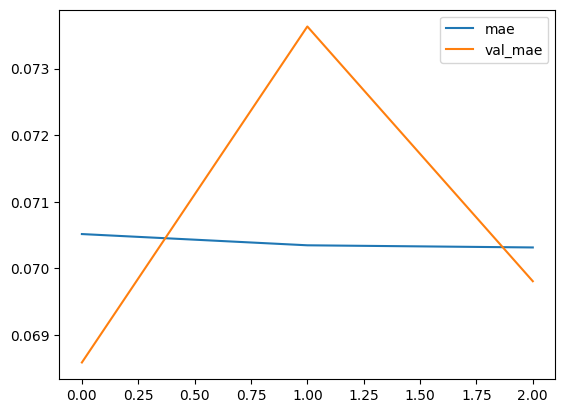

In [30]:
# mean_absolute_error
plt.plot(history.history["mae"], label = "mae")
plt.plot(history.history["val_mae"], label = "val_mae")
plt.legend()
plt.show()

In [ ]:
# Guardamos el modelo
model.save("data/regression_model_NO.keras")

In [21]:
# Cargamos el modelo
from keras.models import load_model

pretrained_model = load_model("data/regression_model_NO.keras")

Volvemos a entrenar el modelo con 2 **epochs** más esperando un mejor r2_score.

In [22]:
history = pretrained_model.fit(X_train, y_train,
                               validation_data = (X_test, y_test),
                               epochs = 2,
                               verbose = 1)

Epoch 1/2
701498/701498 [==============================] - 2410s 3ms/step - loss: 0.0030 - mae: 0.0351 - val_loss: 0.0026 - val_mae: 0.0324
Epoch 2/2
701498/701498 [==============================] - 2410s 3ms/step - loss: 0.0030 - mae: 0.0350 - val_loss: 0.0025 - val_mae: 0.0333


In [23]:
y_hat = pretrained_model.predict(X_test)

175375/175375 [==============================] - 223s 1ms/step


In [24]:
r2 = r2_score(y_test, y_hat)
print("R2 Score: ", r2)

R2 Score:  0.8356962785693187


In [ ]:
# Métricas
scores = model.evaluate(X_test, y_test, verbose = 1)

scores

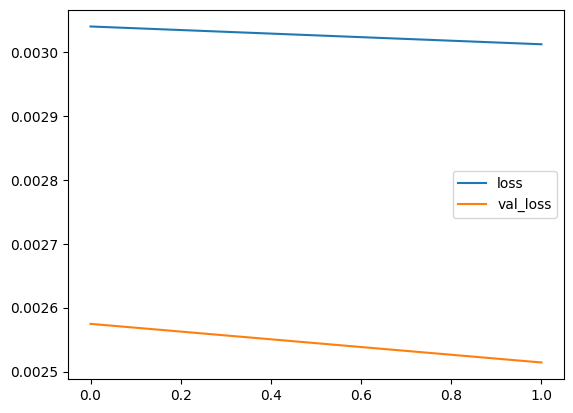

In [25]:
# loss (mean_squared_error)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

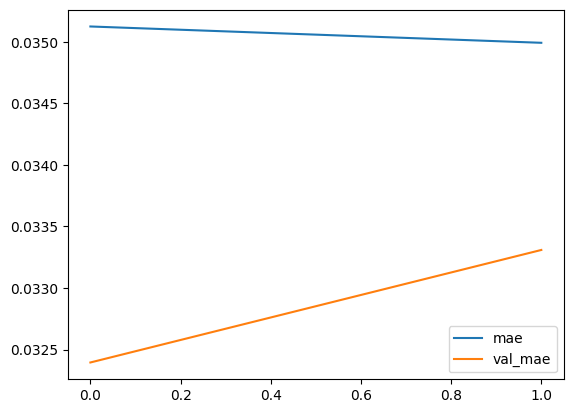

In [26]:
# mean_absolute_error
plt.plot(history.history["mae"], label = "mae")
plt.plot(history.history["val_mae"], label = "val_mae")
plt.legend()
plt.show()

In [ ]:
# Guardamos el modelo
pretrained_model.save("data/regression_model_2_NO.keras")

In [ ]:
#################################################### FIN #######################################################################